# rheomodel

Collection of rheology flow curve models

In [3]:
import lmfit
import rheomodel as rm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, Latex


model=lmfit.Model(rm.HB)
model.param_names

['ystress', 'K', 'n']

In [5]:
x=np.logspace(-3,3)
data=pd.DataFrame({'Shear rate':x,'Stress':rm.TC(x,ystress=10,gammadot_crit=0.1,eta_bg=0.8)})
display(Markdown(data.head().to_markdown()))

|    |   Shear rate |   Stress |
|---:|-------------:|---------:|
|  0 |   0.001      |  11.0008 |
|  1 |   0.00132571 |  11.1525 |
|  2 |   0.00175751 |  11.3271 |
|  3 |   0.00232995 |  11.5283 |
|  4 |   0.00308884 |  11.76   |

In [6]:
res_fit=model.fit(data['Stress'],x=data['Shear rate'],weights=1/data['Stress'])

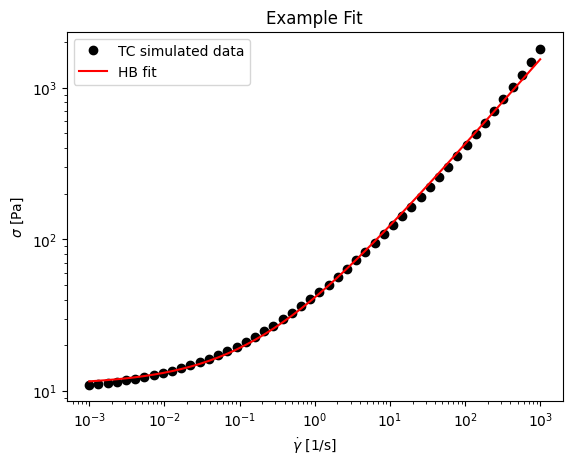

In [7]:
fig, ax = plt.subplots()
ax.plot(res_fit.userkws['x'],res_fit.data, 'o', label='TC simulated data', color='black')
ax.plot(res_fit.userkws['x'],res_fit.eval(), label='HB fit', color='red')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$\dot\gamma$ [1/s]')
ax.set_ylabel('$\sigma$ [Pa]')
ax.legend()
ax.set_title('Example Fit');

## Library structure

* **models.bib** : ships with the library and is the bibtex file with the citation for the source of the model
* **models.py** : list of python function implementing each model expressed as stress as a function shear rate
* **function.py** : library functionality like showing model and citation table

In [14]:
import rheomodel as rm
display(Markdown(rm.library_to_table(rm.library).to_markdown()))

| ID                     | author                                                      | title                                                                                                                                                             | publisher                                  |   year | address   | journal                                                   |   volume |   number | pages      |
|:-----------------------|:------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------|-------:|:----------|:----------------------------------------------------------|---------:|---------:|:-----------|
| newton_1687            | Isaac Newton                                                | Philosophiæ Naturalis Principia Mathematica                                                                                                                       | Josephi Streater                           |   1687 | London    | nan                                                       |      nan |      nan | nan        |
| ostwald_1929           | Ostwald, Wilhelm                                            | Über die Geschwindigkeitsfunktion der Newton'schen Viscosität                                                                                                     | Walter de Gruyter                          |   1929 | nan       | Zeitschrift für physikalische Chemie                      |      102 |        1 | 64--79     |
| bingham_1916           | Bingham, Eugene C.                                          | A new conception of plasticity and viscous flow                                                                                                                   | Elsevier                                   |   1916 | nan       | The Journal of the Franklin Institute                     |      181 |        6 | 543--552   |
| herschel_bulkley_1926  | Herschel, Winslow Hobart and Bulkley, Robert                | Measurement of consistency as applied to rubber-benzene solutions                                                                                                 | American Society for Testing and Materials |   1926 | nan       | Proceedings of the American Society for Testing Materials |       26 |        2 | 621--633   |
| carreau_yasuda_1979    | Carreau, Pierre J. and Yasuda, Koichi                       | Rheological equations from molecular network theories                                                                                                             | Wiley                                      |   1979 | nan       | Journal of Polymer Science                                |       11 |        2 | 371--388   |
| cross_1925             | Cross, Malcolm M.                                           | Viscosity of Colloids                                                                                                                                             | ACS Publications                           |   1925 | nan       | The Journal of Physical Chemistry                         |       29 |       11 | 1409--1426 |
| caggioni2020variations | Caggioni, Marco and Trappe, Veronique and Spicer, Patrick T | Variations of the Herschel--Bulkley exponent reflecting contributions of the viscous continuous phase to the shear rate-dependent stress of soft glassy materials | AIP Publishing                             |   2020 | nan       | Journal of Rheology                                       |       64 |        2 | 413--422   |

In [8]:
for ID, model in rm.models.model_dict.items():
    display(ID, Latex(model.latex))

'caggioni2020variations'

<IPython.core.display.Latex object>

'herschel_bulkley_1926'

<IPython.core.display.Latex object>

'newton_1687'

<IPython.core.display.Latex object>

'ostwald_1929'

<IPython.core.display.Latex object>

'cross_1925'

<IPython.core.display.Latex object>

'bingham_1916'

<IPython.core.display.Latex object>

In [9]:
!jupyter nbconvert --to markdown README.ipynb

[NbConvertApp] Converting notebook README.ipynb to markdown
[NbConvertApp] Support files will be in README_files/
[NbConvertApp] Writing 6250 bytes to README.md
